In [1]:
import numpy as np
import pandas as pd
cr = pd.read_csv('C:/Users/shubh/Pranjal Sir class/fwd/CreditRisk.csv')

In [2]:
# 1Biuld a predictive model wheateher Loan can be approved or not Target Varible is
# 2Run a campaign which can target the good customers and offer them some new loan)

In [3]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
cr.Credit_History = cr.Credit_History.fillna(1)
cr.Gender = cr.Gender.fillna("Male")
cr.Married= cr.Married.fillna("No")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna("Yes")
cr.LoanAmount= cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.LoanAmount.mean())

In [5]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


In [7]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


from sklearn.preprocessing import LabelEncoder 
Le=LabelEncoder()
cr[cr.select_dtypes(include=['object']).columns]=cr[cr.select_dtypes(include=['object']).columns].apply(Le.fit_transform)

In [8]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [9]:
cr.Loan_Status = le.fit_transform(cr.Loan_Status)

In [10]:
cr.Gender = le.fit_transform(cr.Gender)

cr.Education = le.fit_transform(cr.Education)

cr.Married = le.fit_transform(cr.Married)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)

cr.Property_Area = le.fit_transform(cr.Property_Area)

In [11]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [12]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int32  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int32  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int32  
 12  Loan_Status        981 non-null    int32  
dtypes: float64(5), int32(6), int64(1), object(1)
memory usage: 76.8+ KB


In [13]:
cr1 = cr

In [14]:
# Sampling(train and Test)

In [15]:
cr = cr.iloc[:,1:] # removing loan_id column

In [16]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [17]:
from sklearn.model_selection import train_test_split
cr_train, cr_test = train_test_split(cr, test_size = .2)

In [18]:
cr_train_x = cr_train.iloc[:,0:-1]
cr_train_y = cr_train.iloc[:,-1]

In [19]:
cr_test_x = cr_test.iloc[:,0:-1]
cr_test_y = cr_test.iloc[:,-1]

In [20]:
print(cr_train_x.shape)
print(cr_train_y.shape)
print('-------------')
print(cr_test_x.shape)
print(cr_test_y.shape)

(784, 11)
(784,)
-------------
(197, 11)
(197,)


In [21]:
#iport sklearn -->create object -->fit functions

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg_cr = LogisticRegression()

In [24]:
logreg_cr.fit(cr_train_x, cr_train_y)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
pred_cr_train = logreg_cr.predict(cr_train_x)
# pred_cr_train

In [26]:
pred_cr = logreg_cr.predict(cr_test_x)

In [27]:
pred_cr

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [28]:
cr_test_y # actual Values for test data

244    1
609    1
913    1
390    1
1      0
      ..
671    1
483    1
952    1
849    0
682    1
Name: Loan_Status, Length: 197, dtype: int32

In [29]:
#create Confusion Matrix
from sklearn.metrics import confusion_matrix

In [30]:
tab_cr = confusion_matrix(pred_cr, cr_test_y) # first would be predicted and then actual

In [31]:
tab_cr

array([[ 34,   3],
       [ 26, 134]], dtype=int64)

In [32]:
# a = [1,0,0,1,1,1]
# b = [1,1,1,1,1,0]

In [33]:
# confusion_matrix(a,b)

In [34]:
tab_cr.diagonal()

array([ 34, 134], dtype=int64)

In [35]:
tab_cr.diagonal().sum()

168

In [36]:
Acc = tab_cr.diagonal().sum() * 100/ tab_cr.sum()
Acc

85.27918781725889

In [37]:
logreg_cr.coef_

array([[ 2.30764789e-01,  6.97510402e-01,  4.36152743e-02,
        -3.09818456e-01,  3.36925563e-02, -7.11238386e-06,
        -2.67209345e-05, -2.72423467e-03, -7.23807553e-03,
         3.31276101e+00,  5.11704616e-01]])

In [38]:
logreg_cr.intercept_

array([0.15910076])

In [39]:
pred_prob_train = logreg_cr.predict_proba(cr_train_x)
pred_prob_test = logreg_cr.predict_proba(cr_test_x)

In [40]:
pred_prob_test # for each record you get two probabilty or answer

array([[0.17961119, 0.82038881],
       [0.34251466, 0.65748534],
       [0.18188099, 0.81811901],
       [0.33132512, 0.66867488],
       [0.19521843, 0.80478157],
       [0.08152071, 0.91847929],
       [0.0200082 , 0.9799918 ],
       [0.07077316, 0.92922684],
       [0.87708538, 0.12291462],
       [0.15290147, 0.84709853],
       [0.03876767, 0.96123233],
       [0.26136355, 0.73863645],
       [0.23960414, 0.76039586],
       [0.23042784, 0.76957216],
       [0.10843203, 0.89156797],
       [0.36154208, 0.63845792],
       [0.06118531, 0.93881469],
       [0.20709529, 0.79290471],
       [0.74589665, 0.25410335],
       [0.83743085, 0.16256915],
       [0.66243687, 0.33756313],
       [0.75386786, 0.24613214],
       [0.14973261, 0.85026739],
       [0.15682144, 0.84317856],
       [0.93463212, 0.06536788],
       [0.02750633, 0.97249367],
       [0.07325219, 0.92674781],
       [0.01826639, 0.98173361],
       [0.07744977, 0.92255023],
       [0.55149918, 0.44850082],
       [0.

In [41]:
pred_cr

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [42]:
pred_prob_test = pd.DataFrame(pred_prob_test)

In [43]:
pred_prob_test.rename(columns={pred_prob_test.columns[0]:'Pedicted_probabilty0',
                               pred_prob_test.columns[1]:'Pedicted_probabilty1'}, inplace=True)

In [44]:
pred_prob_test

,Pedicted_probabilty0,Pedicted_probabilty1
0,0.179611,0.820389
1,0.342515,0.657485
2,0.181881,0.818119
3,0.331325,0.668675
4,0.195218,0.804782
...,...,...
192,0.038757,0.961243
193,0.169157,0.830843
194,0.083412,0.916588
195,0.853446,0.146554


In [45]:
#Auroc Curve

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

In [47]:
fpr, tpr, threshold = roc_curve(cr_test_y, pred_prob_test.iloc[:,1])

In [48]:
tpr

array([0.        , 0.00729927, 0.05109489, 0.05109489, 0.0729927 ,
       0.0729927 , 0.12408759, 0.12408759, 0.15328467, 0.15328467,
       0.19708029, 0.19708029, 0.28467153, 0.28467153, 0.33576642,
       0.33576642, 0.34306569, 0.34306569, 0.48905109, 0.48905109,
       0.49635036, 0.49635036, 0.6350365 , 0.6350365 , 0.65693431,
       0.65693431, 0.69343066, 0.69343066, 0.7080292 , 0.7080292 ,
       0.76642336, 0.76642336, 0.82481752, 0.82481752, 0.8540146 ,
       0.8540146 , 0.89051095, 0.89051095, 0.89781022, 0.89781022,
       0.9270073 , 0.9270073 , 0.94890511, 0.94890511, 0.95620438,
       0.95620438, 0.97810219, 0.97810219, 0.98540146, 0.98540146,
       0.99270073, 0.99270073, 1.        , 1.        ])

In [49]:
fpr

array([0.        , 0.        , 0.        , 0.01666667, 0.01666667,
       0.03333333, 0.03333333, 0.05      , 0.05      , 0.06666667,
       0.06666667, 0.08333333, 0.08333333, 0.1       , 0.1       ,
       0.11666667, 0.11666667, 0.13333333, 0.13333333, 0.15      ,
       0.15      , 0.16666667, 0.16666667, 0.18333333, 0.18333333,
       0.2       , 0.2       , 0.23333333, 0.23333333, 0.25      ,
       0.25      , 0.26666667, 0.26666667, 0.28333333, 0.28333333,
       0.3       , 0.3       , 0.33333333, 0.33333333, 0.35      ,
       0.35      , 0.4       , 0.4       , 0.41666667, 0.41666667,
       0.43333333, 0.43333333, 0.45      , 0.45      , 0.6       ,
       0.6       , 0.95      , 0.95      , 1.        ])

In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
area_auroc = roc_auc_score(cr_test_y, pred_cr)
area_auroc = np.round(area_auroc, 3)
area_auroc

0.772

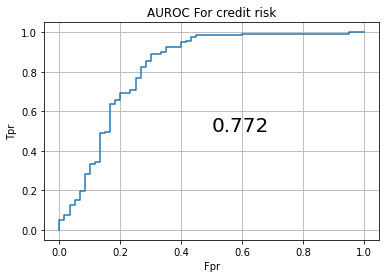

In [52]:
plt.plot(fpr, tpr)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC For credit risk')
plt.text(x=.5, y =.5, s=area_auroc, size=20)
plt.grid()

In [53]:
tab_cr

array([[ 34,   3],
       [ 26, 134]], dtype=int64)

In [54]:
Acc = tab_cr.diagonal().sum() * 100/ tab_cr.sum()
Acc

85.27918781725889

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(pred_cr, cr_test_y)

0.8527918781725888

In [57]:
from sklearn.metrics import precision_score
precision_score(cr_test_y, pred_cr) # ACtual and then Predicted

0.8375

In [58]:
(2*.81305*.978)/(.81305+.978)

0.887929315206164

In [59]:
from sklearn.metrics import f1_score
f1_score( cr_test_y,pred_cr)#ACtual and then Predicted
#confusion matrix Predicted then Actual

0.9023569023569024

In [60]:
from sklearn.metrics import recall_score

In [61]:
recall_score(cr_test_y, pred_cr) ##Tpr

0.9781021897810219

### Camping will run on entire data

In [62]:
pred_full_data = logreg_cr.predict(cr.iloc[:,0:-1])

In [63]:
pred_full_data_prob = logreg_cr.predict_proba(cr.iloc[:,0:-1])

In [64]:
pred_full_data_prob = pd.DataFrame(pred_full_data_prob)

In [65]:
pred_full_data_prob.rename(columns={pred_full_data_prob.columns[0]:'Pedicted_probabilty0',
                               pred_full_data_prob.columns[1]:'Pedicted_probabilty1'}, inplace=True)

In [66]:
pred_full_data_prob.head()

,Pedicted_probabilty0,Pedicted_probabilty1
0,0.155711,0.844289
1,0.195218,0.804782
2,0.065965,0.934035
3,0.109123,0.890877
4,0.155311,0.844689


In [67]:
pred_full_data_prob.shape

(981, 2)

## Lets do 2 things(Remove this col 'Pred_prob0' and add Loan_id columns)

In [68]:
pred_full_data_prob = pd.concat([pred_full_data_prob, cr1.Loan_ID], axis = 1)

In [69]:
pred_full_data_prob = pred_full_data_prob.iloc[:,[1,2]]

In [70]:
pred_full_data_prob.sort_values('Pedicted_probabilty1',ascending=False, inplace=True)

In [71]:
pred_full_data_prob.head(15)

,Pedicted_probabilty1,Loan_ID
497,0.992790,LP002588
686,0.990160,LP001375
575,0.989786,LP002868
14,0.989622,LP001030
68,0.988976,LP001238
936,0.988874,LP002790
667,0.983213,LP001298
798,0.983135,LP002045
19,0.982021,LP001041
133,0.981734,LP001482


In [72]:
# SVM

In [73]:
from sklearn.svm import SVC

In [74]:
svc_cr = SVC()

In [75]:
svc_cr.fit(cr_train_x, cr_train_y)

SVC()

In [76]:
pred_svc = svc_cr.predict(cr_test_x)

In [77]:
tab_svc = confusion_matrix(pred_svc, cr_test_y)
tab_svc

array([[  0,   0],
       [ 60, 137]], dtype=int64)

In [78]:
# RBF
[  0,   0]
[ 56, 141]

# Linear Kernel
[ 28, 1],
[ 28, 140]

# Sigmoid Kernel
[ 17,  37],
[ 39, 104]

# poly 
[  1,   0]
[ 55, 141]


[55, 141]

In [79]:
# Hyper parameter tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
search_dict = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid')}

In [82]:
from sklearn.svm import SVC
# svc_cr  = SVC()
# grid_svc = GridSearchCV(svc_cr, param_grid=search_dict)

In [83]:
# grid_svc.fit(cr_train_x, cr_train_y)

In [84]:
# pred1 = grid_svc.predict(cr_test_x)

In [85]:
# tab1 = confusion_matrix(pred1, cr_test_y)
# tab1

In [86]:
# grid_svc.best_params_

In [87]:
cr_x = cr.iloc[:,0:-1]
cr_y = cr.iloc[:,-1]


In [88]:
cr_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2


In [89]:
from sklearn.feature_selection import RFE

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [91]:
rfe = RFE(dt, 5)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [92]:
rfe.fit(cr_x, cr_y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [93]:
rfe.support_

array([False, False, False, False, False,  True,  True,  True, False,
        True,  True])

In [94]:
feature_imp = pd.DataFrame({'Importance':rfe.support_, 'Columns': cr_x.columns})

In [95]:
feature_imp.sort_values('Importance', ascending=False)

,Importance,Columns
5,True,ApplicantIncome
6,True,CoapplicantIncome
7,True,LoanAmount
9,True,Credit_History
10,True,Property_Area
0,False,Gender
1,False,Married
2,False,Dependents
3,False,Education
4,False,Self_Employed


In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [97]:
rfe = RFE(rfc, 4)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [98]:
rfe.fit(cr_x, cr_y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=4)

In [99]:
rfe.support_

array([False, False, False, False, False,  True,  True,  True, False,
        True, False])

In [100]:
feature_imp = pd.DataFrame({'Importance':rfe.support_, 'Columns': cr_x.columns})

In [101]:
feature_imp.sort_values('Importance', ascending= False)

,Importance,Columns
5,True,ApplicantIncome
6,True,CoapplicantIncome
7,True,LoanAmount
9,True,Credit_History
0,False,Gender
1,False,Married
2,False,Dependents
3,False,Education
4,False,Self_Employed
8,False,Loan_Amount_Term


In [102]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [103]:
rfe = RFE(lin, 2)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [104]:
rfe.fit(cr_x, cr_y)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [105]:
feature_imp = pd.DataFrame({'Importance':rfe.support_, 'Columns': cr_x.columns})
feature_imp.sort_values('Importance', ascending= False)

,Importance,Columns
1,True,Married
9,True,Credit_History
0,False,Gender
2,False,Dependents
3,False,Education
4,False,Self_Employed
5,False,ApplicantIncome
6,False,CoapplicantIncome
7,False,LoanAmount
8,False,Loan_Amount_Term


In [106]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
ref = RFE(nb, 2)
# feature_imp = pd.DataFrame({'Importance':rfe.support_, 'Columns': cr_x.columns})
# feature_imp.sort_values('Importance', ascending= False)


C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [107]:
rfe.fit(cr_x, cr_y)


RFE(estimator=LinearRegression(), n_features_to_select=2)

In [108]:
# rfe.fit(cr_x, cr_y)

In [109]:
from sklearn.feature_selection import chi2
from stat

SyntaxError: invalid syntax (<ipython-input-109-2328523320d6>, line 2)